In [2]:
import pandas as pd
import seaborn as sns
from typing import Tuple
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

csv_path = "diabetes.csv"

Load data

In [91]:
def load_csv(csv_path:str) ->Tuple[pd.DataFrame, pd.DataFrame]:
    dataset = pd.read_csv(csv_path, delimiter=',')
    dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
    x,y = pd.DataFrame(dataset.iloc[:,:8]), pd.DataFrame(dataset.iloc[:,-1])
    return x, y

Train test split
try optim

In [92]:
def train_test_split(features:pd.DataFrame,
                     labels:pd.DataFrame,
                     test_split_ratio:float) -> Tuple:
        
    test_size = int(len(features) * test_split_ratio)
    train_size = len(features) - test_size
    assert len(features) == test_size + train_size, "Size mismatch!"

    x_train,y_train = features.iloc[:train_size,:],labels[:train_size]
    x_test,y_test = features.iloc[train_size:train_size+test_size,:], labels[train_size:train_size + test_size]
    return (x_train,y_train,x_test,y_test)

Cleaning

In [355]:
x,y = load_csv(csv_path)

x_train,y_train,x_test,y_test = train_test_split(x,y,0.2)

medians = x_train.median()

print(x_train.var())

x_train = x_train.replace(0, medians)

print(x_train.var())


Pregnancies                    11.376807
Glucose                      1019.786144
BloodPressure                 404.412637
SkinThickness                 258.283520
Insulin                     13665.150383
BMI                            66.215088
DiabetesPedigreeFunction        0.108327
Age                           140.398920
dtype: float64
Pregnancies                     9.073049
Glucose                       924.890511
BloodPressure                 144.255459
SkinThickness                  86.668229
Insulin                     11833.251995
BMI                            47.636498
DiabetesPedigreeFunction        0.108327
Age                           140.398920
dtype: float64


Distance

In [271]:
def euclidean(points:pd.DataFrame,element_of_x:pd.DataFrame) -> pd.DataFrame:
    element_of_x = element_of_x.reindex(points.index).ffill()
    distances = ((points - element_of_x) ** 2).sum(axis=1) ** 0.5
    return pd.DataFrame(distances, columns=['distance'])

Predict func

In [325]:
def predict(x_train:pd.DataFrame,y_train:pd.DataFrame,x_test:pd.DataFrame,k:int) -> pd.DataFrame:
    labels_pred = []
    for x_test_element in x_test.itertuples(index=False):
        
        row = pd.DataFrame(x_test_element).transpose()
        row.columns = x_test_element._fields

        distances = euclidean(x_train.reset_index(drop=True), row)
        distances = pd.concat([distances, y_train], axis=1)
        distances.sort_values(by='distance', axis=0, inplace=True)

        label_pred = distances.iloc[:k, -1].mode()[0]
        labels_pred.append(label_pred)
    return pd.DataFrame(labels_pred, columns=['Outcome'])

In [356]:
x_train, y_train, x_test, y_test = train_test_split(x,y, 0.2)

y_preds = predict(x_train, y_train, x_test, 7)

print(y_preds.head(30))

    Outcome
0         0
1         1
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        1
11        0
12        0
13        0
14        0
15        1
16        0
17        1
18        0
19        0
20        0
21        1
22        0
23        0
24        1
25        1
26        0
27        0
28        1
29        0


Metrics

In [369]:
def accuracy(y_test:pd.Series,y_preds:pd.DataFrame) -> float:
    y_test.reset_index(drop=True, inplace=True)
    true_positive = int((y_test == y_preds).sum())
    return true_positive / y_test.size * 100

print(accuracy(y_test, y_preds))

73.8562091503268


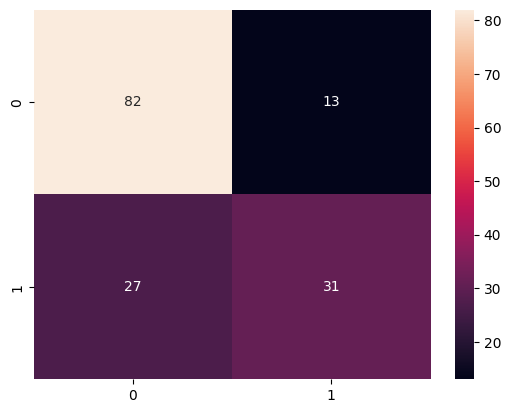

In [359]:
def plot_confusion_matrix(y_test:pd.DataFrame,y_preds:pd.DataFrame):
        conf_matrix = confusion_matrix(y_test,y_preds)
        sns.heatmap(conf_matrix,annot=True) 

plot_confusion_matrix(y_test, y_preds)

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(x,y,0.2)

y_preds = predict(x_train, y_train, x_test, 3)

print(accuracy(y_test, y_preds))

In [374]:
def best_k() -> Tuple[int, float]:
    results = []
    for k in range(1,21):
        x = (k, round(accuracy(y_test, predict(x_train, y_train, x_test, k)),2))
        print(x)
        results.append(x)
    return max(results, key=lambda x:x[1])

print(best_k())

(1, 63.4)
(2, 67.97)
(3, 66.67)
(4, 71.9)
(5, 69.28)
(6, 74.51)
(7, 73.86)
(8, 73.86)
(9, 75.16)
(10, 73.86)
(11, 73.86)
(12, 71.9)
(13, 72.55)
(14, 73.86)
(15, 74.51)
(16, 73.86)
(17, 72.55)
(18, 75.16)
(19, 74.51)
(20, 73.86)
(9, 75.16)
